In [38]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

In [3]:
dataset = 'C:/Users/Ryan Gunawan/Downloads/heart.csv'
df = pd.read_csv(dataset, sep=',')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
#Data Cleaning
df.duplicated().any()

True

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isna().any()

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
restecg     False
thalachh    False
exng        False
oldpeak     False
slp         False
caa         False
thall       False
output      False
dtype: bool

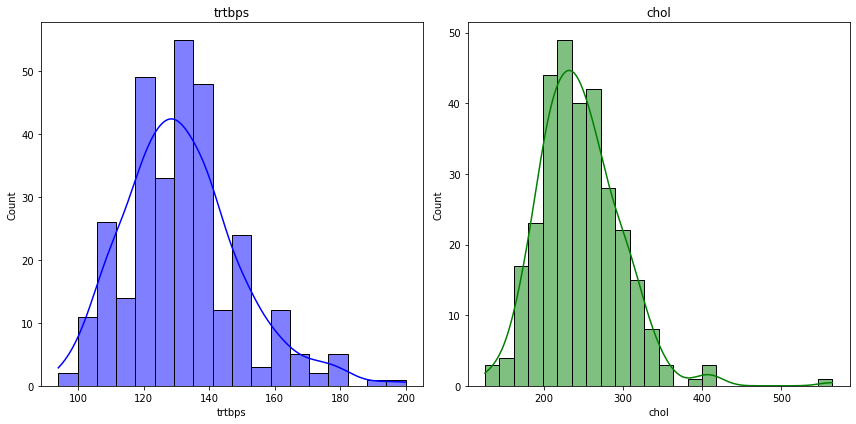

In [23]:
#EDA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['trtbps'], kde=True, color='blue')
plt.title('trtbps')

plt.subplot(1, 2, 2)
sns.histplot(df['chol'], kde=True, color='green')
plt.title('chol')

plt.tight_layout()
plt.show()

In [33]:
#Logistic Regression
X = df.drop("output", axis=1)
y = df["output"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
Log = LogisticRegression(random_state=0)
Log.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [31]:
ypred = Log.predict(X_test_scaled)
ypred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [32]:
Matrix = confusion_matrix(y_test,ypred)
print("Confusion Matrix \n", Matrix)

accuracy = accuracy_score(y_test,ypred)
print("Accuracy Score: ", accuracy)

Confusion Matrix 
 [[14  3]
 [ 2 12]]
Accuracy Score:  0.8387096774193549


In [34]:
#KNN
KNN = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
KNN.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean')

In [35]:
ypredKNN = KNN.predict(X_test_scaled)
ypredKNN

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

In [36]:
Matrix = confusion_matrix(y_test,ypredKNN)
print("Confusion Matrix \n", Matrix)

accuracy = accuracy_score(y_test,ypredKNN)
print("Accuracy Score: ", accuracy)

Confusion Matrix 
 [[15  2]
 [ 3 11]]
Accuracy Score:  0.8387096774193549


In [40]:
#Naive Bayes
GNB = GaussianNB()
GNB.fit(X_train_scaled, y_train)

GaussianNB()

In [42]:
y_pred = GNB.predict(X_test_scaled)
print(y_pred)

[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0]


In [43]:
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Confusion Matrix:
[[13  4]
 [ 2 12]]
Accuracy Score: 0.8064516129032258


Dari 3 model di atas (Logistic Regression, K-Nearest Neighbor,  Naive Bayes) model dengan akurasi tertinggi adalah Logistic Regression dan K-Nearest Neighbor dengan nilai akurasi = 0.8387096774193549 